In [78]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/nltkbhai/nltk_data/corpora/wordnet/data.adj
/kaggle/input/nltkbhai/nltk_data/corpora/wordnet/LICENSE
/kaggle/input/nltkbhai/nltk_data/corpora/wordnet/index.adj
/kaggle/input/nltkbhai/nltk_data/corpora/wordnet/README
/kaggle/input/nltkbhai/nltk_data/corpora/wordnet/verb.exc
/kaggle/input/nltkbhai/nltk_data/corpora/wordnet/index.adv
/kaggle/input/nltkbhai/nltk_data/corpora/wordnet/index.verb
/kaggle/input/nltkbhai/nltk_data/corpora/wordnet/data.verb
/kaggle/input/nltkbhai/nltk_data/corpora/wordnet/lexnames
/kaggle/input/nltkbhai/nltk_data/corpora/wordnet/data.noun
/kaggle/input/nltkbhai/nltk_data/corpora/wordnet/noun.exc
/kaggle/input/nltkbhai/nltk_data/corpora/wordnet/index.noun
/kaggle/input/nltkbhai/nltk_data/corpora/wordnet/adj.exc
/kaggle/input/nltkbhai/nltk_data/corpora/wordnet/index.sense
/kaggle/input/nltkbhai/nltk_data/corpora/wordnet/adv.exc
/kaggle/input/nltkbhai/nltk_data/corpora/wordnet/cntlist.rev
/kaggle/input/nltkbhai/nltk_data/corpora/wordnet/data.adv
/kagg

Importing Libraries and Dataset

In [137]:
%%capture
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split

# Text Pre-processing libraries
import nltk
import string
import warnings
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud

# Tensorflow imports to build the model.
import tensorflow as tf
from tensorflow import keras
from keras import layers
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

nltk.download('stopwords')
nltk.download('omw-1.4')
nltk.download('wordnet')
warnings.filterwarnings('ignore')


Load the dataset into a pandas data frame and look at the first five rows of the dataset

In [138]:
df = pd.read_csv('/kaggle/input/hate-speech/labeled_data.csv')
df.head()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [139]:
df.shape

(24783, 7)

In [140]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24783 entries, 0 to 24782
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          24783 non-null  int64 
 1   count               24783 non-null  int64 
 2   hate_speech         24783 non-null  int64 
 3   offensive_language  24783 non-null  int64 
 4   neither             24783 non-null  int64 
 5   class               24783 non-null  int64 
 6   tweet               24783 non-null  object
dtypes: int64(6), object(1)
memory usage: 1.3+ MB


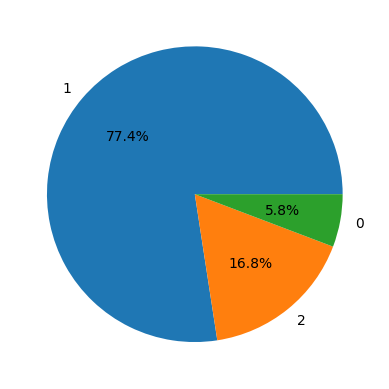

In [141]:
plt.pie(df['class'].value_counts().values,labels = df['class'].value_counts().index,autopct='%1.1f%%')
plt.show()

Although removing data means loss of information but we need to do this to make the data perfect to feed into a machine learning model.

In [142]:
# Lower case all the words of the tweet before any preprocessing
df['tweet'] = df['tweet'].str.lower()

# Removing punctuations present in the text
punctuations_list = string.punctuation
def remove_punctuations(text):
	temp = str.maketrans('', '', punctuations_list)
	return text.translate(temp)

df['tweet']= df['tweet'].apply(lambda x: remove_punctuations(x))
df.head()


,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,rt mayasolovely as a woman you shouldnt compl...
1,1,3,0,3,0,1,rt mleew17 boy dats coldtyga dwn bad for cuff...
2,2,3,0,3,0,1,rt urkindofbrand dawg rt 80sbaby4life you eve...
3,3,3,0,2,1,1,rt cganderson vivabased she look like a tranny
4,4,6,0,6,0,1,rt shenikaroberts the shit you hear about me ...


In [143]:
import os
import nltk

In [144]:
import os

# Path to the uploaded directory (update this path based on your upload location)
uploaded_dir_path = '/kaggle/input/nltkbhai/nltk_data'

# List the contents of the uploaded directory to ensure it is correctly uploaded
print(os.listdir(uploaded_dir_path))

['corpora']


In [145]:
import os
import nltk

# Path to the uploaded directory
nltk_data_dir = r'/kaggle/input/nltk-data'

# Set the NLTK_DATA environment variable to the uploaded directory
os.environ['NLTK_DATA'] = nltk_data_dir

# Point NLTK to the uploaded data directory
nltk.data.path.append(nltk_data_dir)

# Verify if the paths are correctly set
print(nltk.data.path)



['/root/nltk_data', '/usr/share/nltk_data', '/usr/local/share/nltk_data', '/usr/lib/nltk_data', '/usr/local/lib/nltk_data', '/kaggle/input/nltk-data', '/kaggle/input/nltkbhai/nltk_data', '/kaggle/input/nltkbhai/nltk_data', '/kaggle/input/nltkbhai/nltk_data', '/kaggle/input/nltkbhai/nltk_data', '/kaggle/input/nltkbhai/nltk_data', '/kaggle/input/nltkbhai/nltk_data', '/kaggle/input/nltk-data', '/kaggle/input/nltkbhai/nltk_data', '/kaggle/input/nltk-data', '/kaggle/input/nltkbhai/nltk_data', '/kaggle/input/nltk-data']


In [146]:
# Text Pre-processing libraries
import nltk
import string
import warnings
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud

In [147]:
import pandas as pd
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

The below function is a helper function that will help us to remove the stop words and Lemmatize the important words.

In [148]:
nltk.data.path.append('/kaggle/input/nltkbhai/nltk_data')

# Load stopwords from the local directory
stop_words = set(stopwords.words('english'))

df = pd.read_csv('/kaggle/input/hate-speech/labeled_data.csv')
def remove_stopwords(text):
    word_tokens = word_tokenize(text)
    filtered_text = [word for word in word_tokens if word.lower() not in stop_words]
    return ' '.join(filtered_text)

df['tweet'] = df['tweet'].apply(remove_stopwords)
print(df.head())

   Unnamed: 0  count  hate_speech  offensive_language  neither  class  \
0           0      3            0                   0        3      2   
1           1      3            0                   3        0      1   
2           2      3            0                   3        0      1   
3           3      3            0                   2        1      1   
4           4      6            0                   6        0      1   

                                               tweet  
0  ! ! ! RT @ mayasolovely : woman n't complain c...  
1  ! ! ! ! ! RT @ mleew17 : boy dats cold ... tyg...  
2  ! ! ! ! ! ! ! RT @ UrKindOfBrand Dawg ! ! ! ! ...  
3  ! ! ! ! ! ! ! ! ! RT @ C_G_Anderson : @ viva_b...  
4  ! ! ! ! ! ! ! ! ! ! ! ! ! RT @ ShenikaRoberts ...  


Word cloud is a text visualization tool that help’s us to get insights into the most frequent words present in the corpus of the data. Implementing it here.

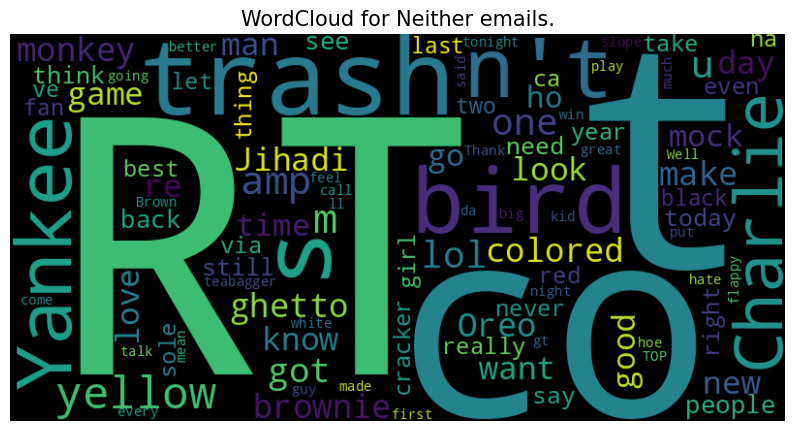

In [149]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud


def plot_word_cloud(data, typ):
    # Joining all the tweets to get the corpus
    email_corpus = " ".join(data['tweet'])
    
    plt.figure(figsize=(10, 10))
    
    # Forming the word cloud
    wc = WordCloud(max_words=100, width=800, height=400, collocations=False).generate(email_corpus)
    
    # Plotting the wordcloud obtained above
    plt.title(f'WordCloud for {typ} emails.', fontsize=15)
    plt.axis('off')
    plt.imshow(wc, interpolation='bilinear')
    plt.show()
    print()

# Filtering the DataFrame for class==2
filtered_df = df[df['class'] == 2]

# Plotting the word cloud for filtered DataFrame
plot_word_cloud(filtered_df, typ='Neither')

Using a mixture of down sampling and up sampling to balance the data

In [150]:
class_2 = df[df['class'] == 2]
class_1 = df[df['class'] == 1].sample(n=3500)
class_0 = df[df['class'] == 0]

balanced_df = pd.concat([class_0, class_0, class_0, class_1, class_2], axis=0)


Let’s check what is the data distribution in the three classes.

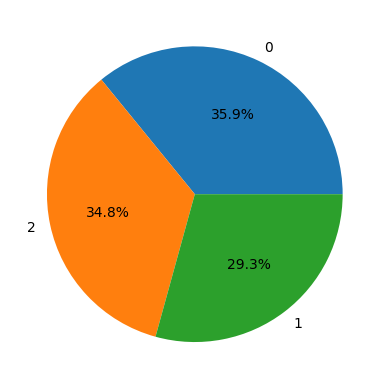

In [180]:
plt.pie(balanced_df['class'].value_counts().values,
		labels=balanced_df['class'].value_counts().index,
		autopct='%1.1f%%')
plt.show()


# Word2Vec Conversion
We cannot feed words to a machine learning model because they work on numbers only. So, first, we will convert the our words to vectors with the token id’s to the corresponding words and after padding them our textual data will arrive to a stage where we can feed it to a model.

In [181]:
from sklearn.model_selection import train_test_split

features = balanced_df['tweet']
target = balanced_df['class']

X_train, X_val, Y_train, Y_val = train_test_split(features,
												target,
												test_size=0.2,
												random_state=22)
X_train.shape, X_val.shape


((9562,), (2391,))

In [182]:
Y_train = pd.get_dummies(Y_train)
Y_val = pd.get_dummies(Y_val)
Y_train.shape, Y_val.shape


((9562, 3), (2391, 3))

In [183]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences


The labels of the classes have been converted into one-hot-encoded vectors. For this, we will use a vocabulary size of 5000 with each tweet, not more than 100 in length.



In [184]:
max_words = 5000
max_len = 100
input_length = max_len

token = Tokenizer(num_words=max_words,
				lower=True,
				split=' ')

token.fit_on_texts(X_train)


We have fitted the tokenizer on our training data we will use it to convert the training and validation data both to vectors.

In [185]:
# training the tokenizer
max_words = 5000
token = Tokenizer(num_words=max_words,
				lower=True,
				split=' ')


# Initialize and fit tokenizer
token = Tokenizer(num_words=max_words, lower=True, split=' ')
token.fit_on_texts(df['tweet'])

# Convert text to sequences and pad them
Training_seq = token.texts_to_sequences(df['tweet'])
Training_pad = pad_sequences(Training_seq, maxlen=max_len, padding='post', truncating='post')


# Print the padded sequences to verify
print("Padded sequences:\n", Training_pad)



Padded sequences:
 [[   2  305    3 ...    0    0    0]
 [   2  153 1191 ...    0    0    0]
 [   2  724    2 ...    0    0    0]
 ...
 [ 308 3219   76 ...    0    0    0]
 [  18 1020    5 ...    0    0    0]
 [ 656 1261 1066 ...    0    0    0]]


In [186]:
import numpy as np
Y_train = np.array(df['class'])
from sklearn.model_selection import train_test_split

X_train, X_val, Y_train, Y_val = train_test_split(Training_pad, Y_train, test_size=0.2, random_state=42)
print(Y_val)

[1 1 2 ... 1 1 1]


# Model Development and Evaluation
We will implement a Sequential model which will contain the following parts:

* Three Embedding Layers to learn a featured vector representations of the input vectors.
* A Bidirectional LSTM layer to identify useful patterns in the sequence.
* Then we will have one fully connected layer.
* We have included some BatchNormalization layers to enable stable and fast training and a Dropout layer before the final layer to avoid any possibility of overfitting.
* The final layer is the output layer which outputs soft probabilities for the three classes. 

In [187]:
model = keras.models.Sequential([
	layers.Embedding(max_words, 32, input_length=max_len),
	layers.Bidirectional(layers.LSTM(16)),
	layers.Dense(512, activation='relu', kernel_regularizer='l1'),
	layers.BatchNormalization(),
	layers.Dropout(0.3),
	layers.Dense(3, activation='softmax')
])

model.compile(loss='categorical_crossentropy',
			optimizer='adam',
			metrics=['accuracy'])

model.build(input_shape=(None, input_length))

model.summary()


Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_10 (Embedding)        │ (None, 100, 32)        │       160,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_10                │ (None, 32)             │         6,272 │
│ (Bidirectional)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 512)            │        16,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 3)              │         1,539 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 186,755 (729.51 KB)

 Trainable params: 185,731 (725.51 KB)

 Non-trainable params: 1,024 (4.00 KB)

While compiling a model we provide these three essential parameters:

* optimizer – This is the method that helps to optimize the cost function by using gradient descent.
* loss – The loss function by which we monitor whether the model is improving with training or not.
* metrics – This helps to evaluate the model by predicting the training and the validation data.

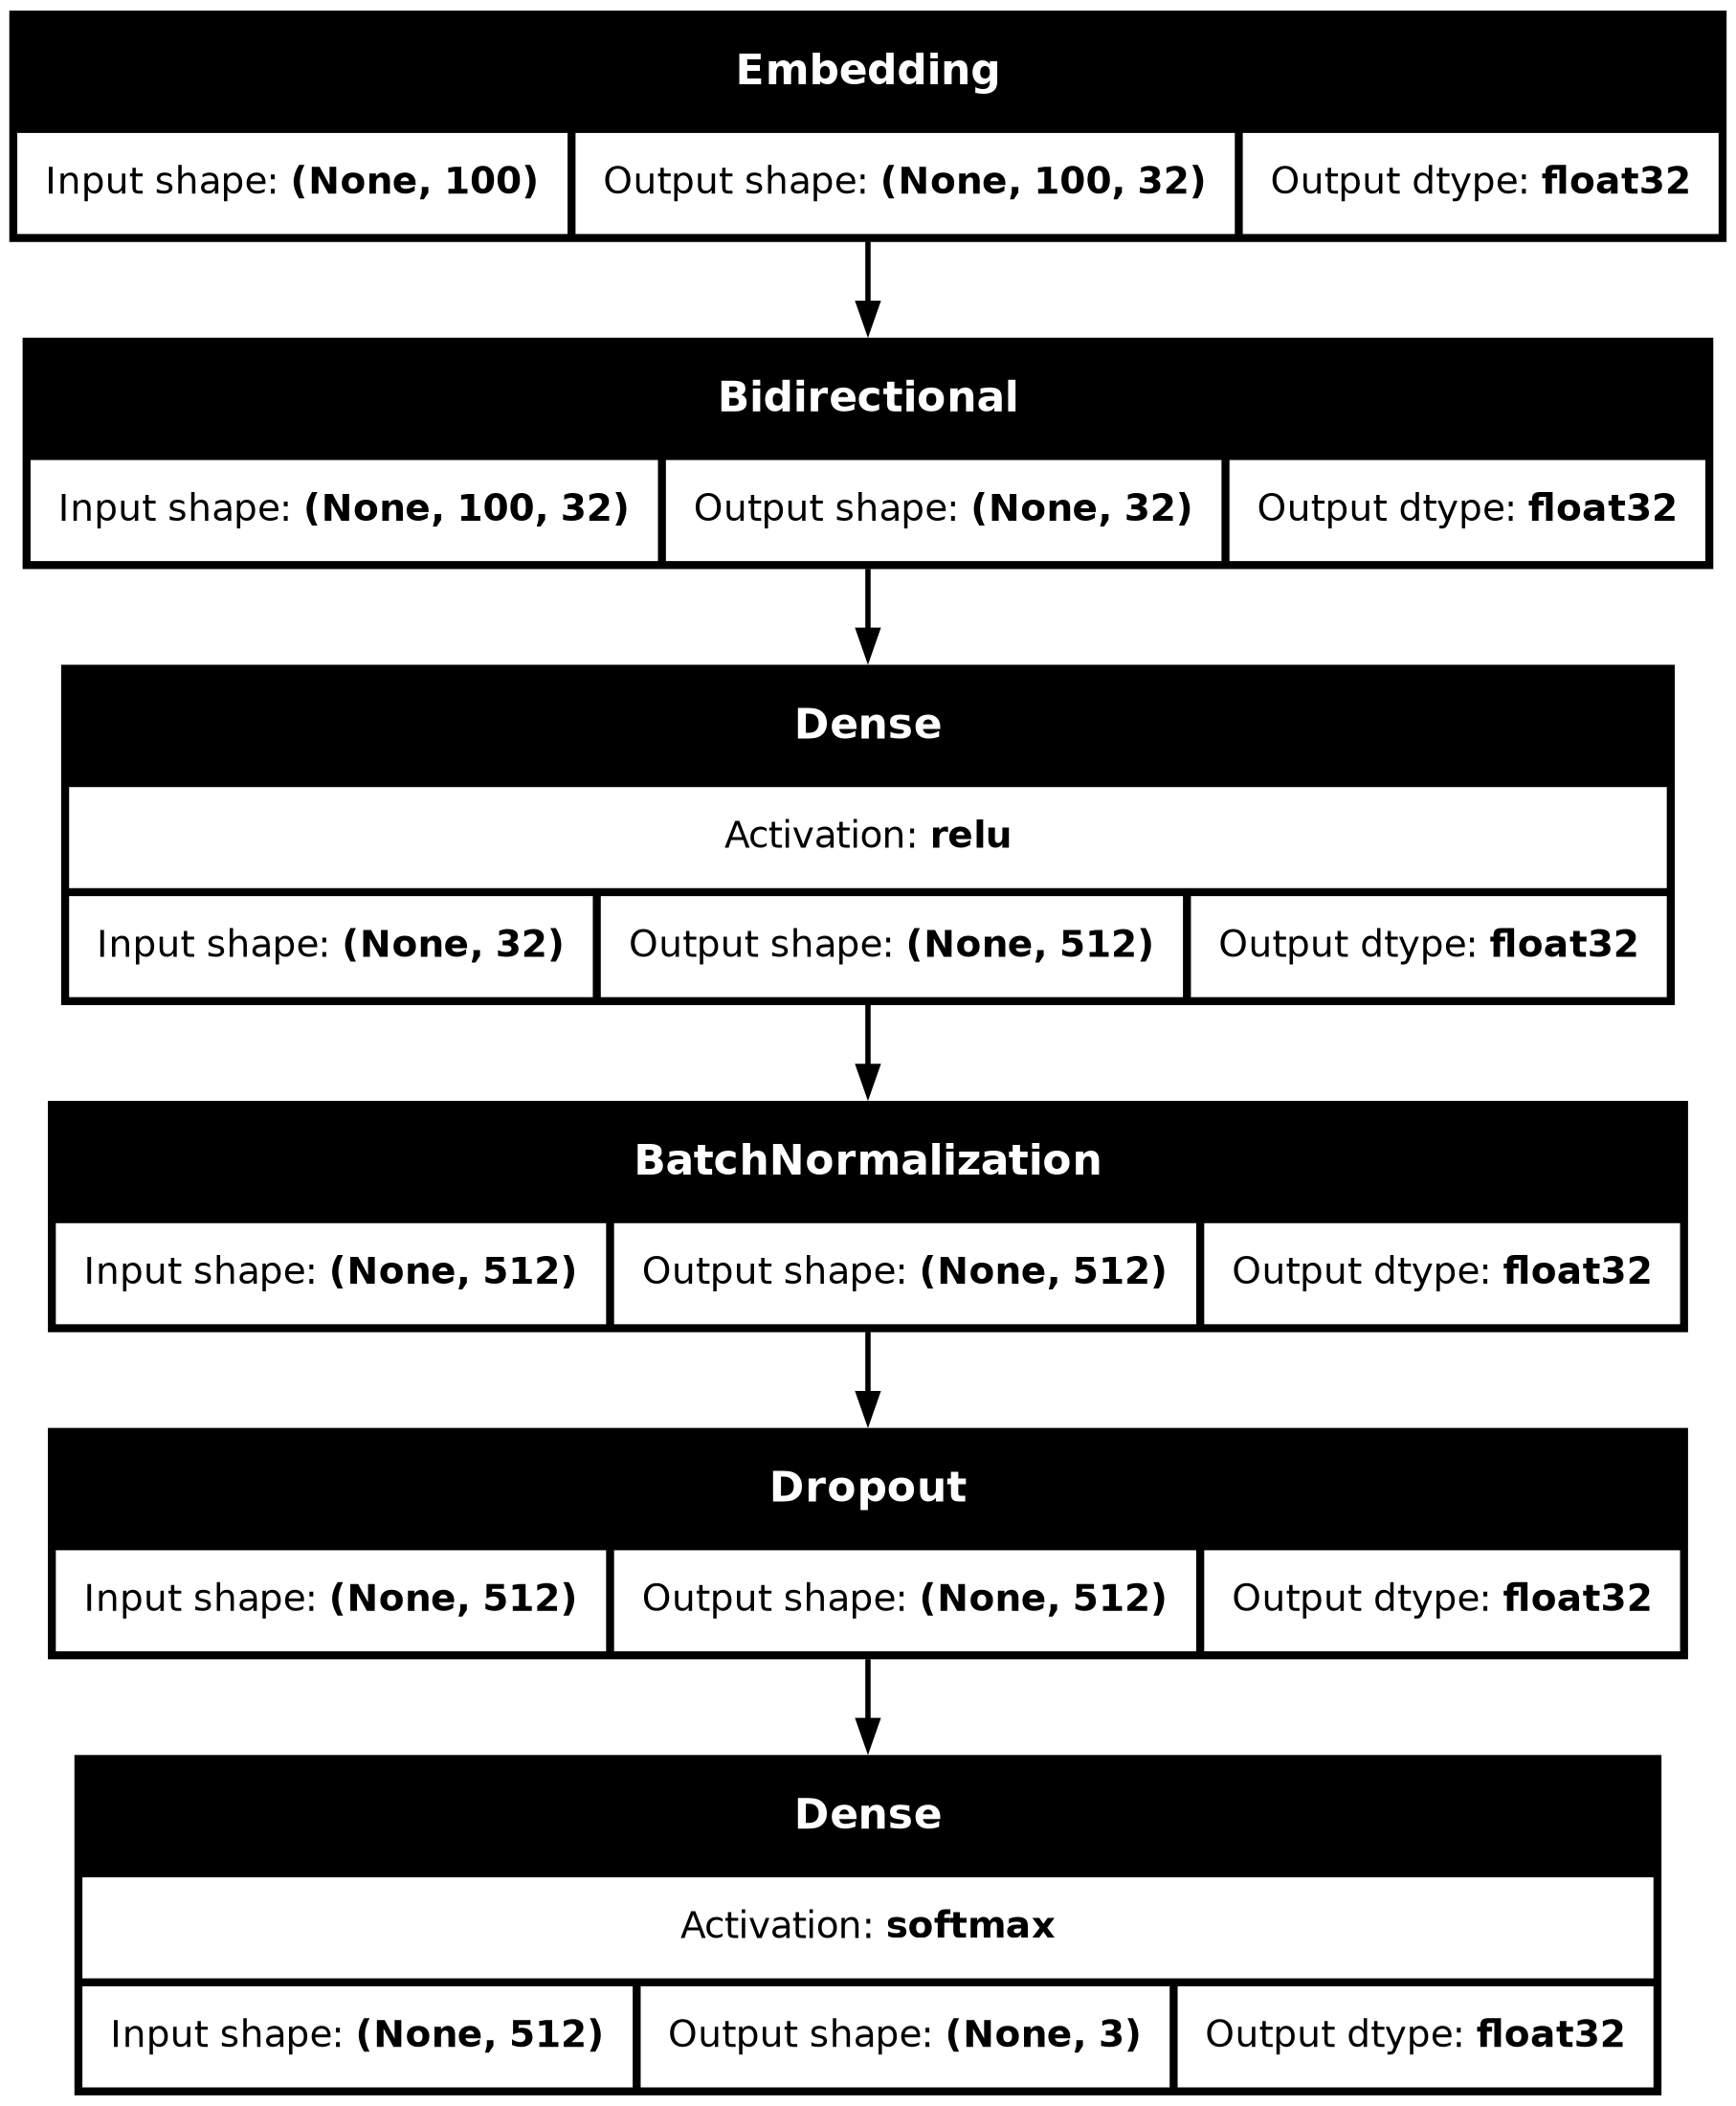

In [188]:
keras.utils.plot_model(
	model,
	show_shapes=True,
	show_dtype=True,
	show_layer_activations=True
)


In [189]:
from tensorflow.keras.utils import to_categorical

# Assuming Y_train and Y_val are integer labels
Y_train = to_categorical(Y_train, num_classes=3)  # Adjust num_classes based on your dataset
Y_val = to_categorical(Y_val, num_classes=3)


In [190]:
print("X_train shape:", X_train.shape)
print("Y_train shape:", Y_train.shape)
print("X_val shape:", X_val.shape)
print("Y_val shape:", Y_val.shape)


X_train shape: (19826, 100)
Y_train shape: (19826, 3)
X_val shape: (4957, 100)
Y_val shape: (4957, 3)


# Callback
Callbacks are used to check whether the model is improving with each epoch or not. If not then what are the necessary steps to be taken like ReduceLROnPlateau decreases learning rate further. Even then if model performance is not improving then training will be stopped by EarlyStopping. We can also define some custom callbacks to stop training in between if the desired results have been obtained early.

In [193]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Define EarlyStopping and ReduceLROnPlateau callbacks
es = EarlyStopping(patience=3, monitor='val_accuracy', restore_best_weights=True)
lr = ReduceLROnPlateau(patience=2, monitor='val_loss', factor=0.5, verbose=1)

# Train the model
history = model.fit(X_train, Y_train,
                    validation_data=(X_val, Y_val),
                    epochs=50,
                    verbose=1,
                    batch_size=32,
                    callbacks=[es, lr])




Epoch 1/50
620/620 ━━━━━━━━━━━━━━━━━━━━ 28s 45ms/step - accuracy: 0.9587 - loss: 0.1506 - val_accuracy: 0.8903 - val_loss: 0.4043 - learning_rate: 2.5000e-04
Epoch 2/50
620/620 ━━━━━━━━━━━━━━━━━━━━ 41s 45ms/step - accuracy: 0.9670 - loss: 0.1261 - val_accuracy: 0.8888 - val_loss: 0.4195 - learning_rate: 2.5000e-04
Epoch 3/50
619/620 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.9700 - loss: 0.1155
Epoch 3: ReduceLROnPlateau reducing learning rate to 0.0001250000059371814.
620/620 ━━━━━━━━━━━━━━━━━━━━ 28s 45ms/step - accuracy: 0.9700 - loss: 0.1155 - val_accuracy: 0.8848 - val_loss: 0.4585 - learning_rate: 2.5000e-04
Epoch 4/50
620/620 ━━━━━━━━━━━━━━━━━━━━ 28s 45ms/step - accuracy: 0.9707 - loss: 0.1093 - val_accuracy: 0.8872 - val_loss: 0.4833 - learning_rate: 1.2500e-04


To get a better picture of the training progress we should plot the graph of loss and accuracy epoch-by-epoch.

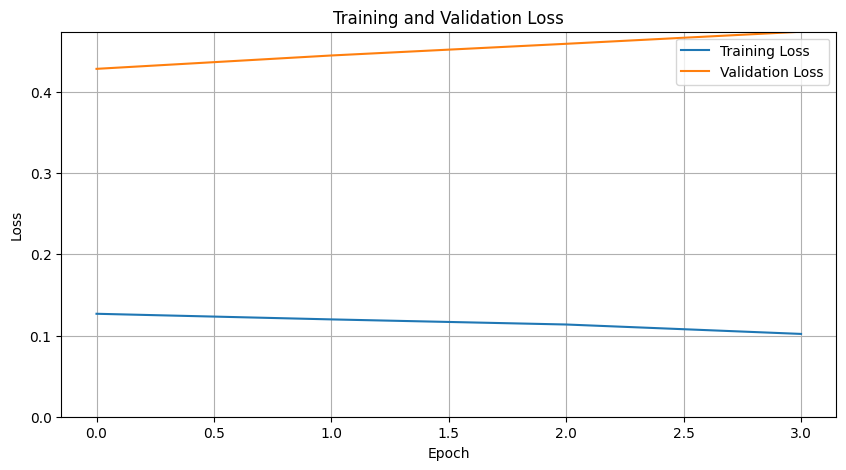

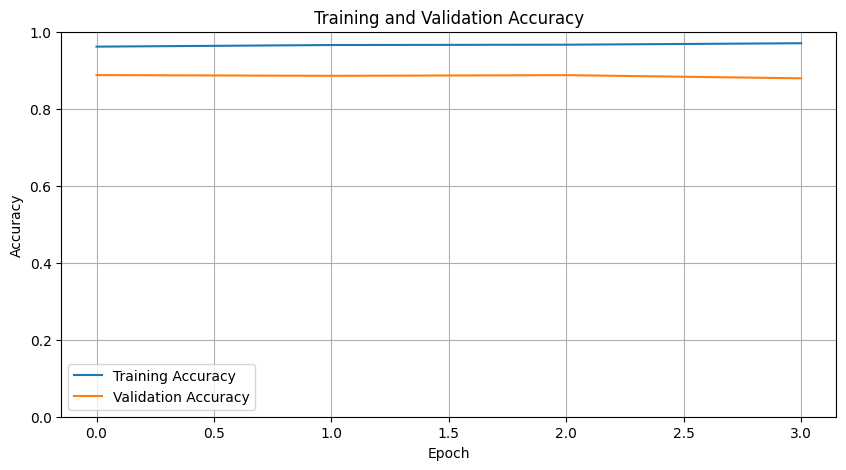

In [194]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming history_df is already defined and contains 'loss', 'val_loss', 'accuracy', 'val_accuracy' columns

# Plot loss
plt.figure(figsize=(10, 5))
plt.plot(history_df['loss'], label='Training Loss')
plt.plot(history_df['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.ylim(0, max(history_df['loss'].max(), history_df['val_loss'].max()))  # Adjust ylim based on maximum loss value
plt.grid(True)
plt.show()

# Plot accuracy
plt.figure(figsize=(10, 5))
plt.plot(history_df['accuracy'], label='Training Accuracy')
plt.plot(history_df['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.ylim(0, 1.0)  # Accuracy ranges from 0 to 1
plt.grid(True)
plt.show()

